**CARS**

The used car market in India has been the center of attention in the slow growing automotive industry in India. In the last year, demand for used cars has soared with over 42 lakh buyers (Source: CRISIL).

A few years ago, the ratio of new cars to used cars was 1:1.2 which is now at 1:2.2. Basically, when 10 new cars are sold, 22 used cars are available for sale in the market.

In 2008-09, the estimated sale of pre-owned cars was at 37 lakhs. For the 2018-19 period, projected sales are at 62 lakhs estimated to be worth Rs.1.62 lakh crores. The average holding time of a new car has come down to just 3 years which was 5-6 years earlier. For the first time aspiring buyer, the used car category has opened up many options.


We will try to analyze all variables present in the dataset and check whether which feature is the most responsible for decrease in the price of a car over the period of years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = pd.read_csv("cardekho_dataset.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


On looking at the data it is noted that we have both the present price and the selling price of the car. Although their might be a difference in purhcase prices depending upon which year the car was purchased, however that can be neglibible as no extreme variation is ever seen in car purchase price.

Now lets create a seprate column giving us the depreciation of each car and add the column to our main data frame

In [3]:
car_depreciation = cars['Present_Price'] - cars['Selling_Price']
cars['depreciation'] = car_depreciation
car_depreciation

0      2.24
1      4.79
2      2.60
3      1.30
4      2.27
5      0.58
6      1.37
7      2.11
8      0.14
9      1.47
10     0.75
11     3.53
12     2.44
13     1.61
14     4.96
15     3.04
16     3.54
17     3.04
18     1.84
19     5.33
20     1.10
21     0.81
22     3.61
23     0.96
24     1.51
25     1.99
26     1.72
27     0.49
28     2.00
29     2.93
       ... 
271    7.00
272    2.50
273    5.25
274    1.50
275    2.70
276    4.95
277    3.90
278    2.40
279    7.35
280    0.65
281    5.50
282    5.75
283    2.81
284    2.40
285    1.10
286    2.25
287    1.75
288    5.20
289    3.49
290    1.90
291    0.70
292    2.00
293    6.65
294    3.05
295    4.54
296    2.10
297    1.90
298    7.65
299    1.00
300    0.60
Length: 301, dtype: float64

Now we know exactly how much depreciation has happened for every car.

But at first let's change our categorical values to numerical values for understanding the correlation of variables.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(cars['Fuel_Type'])
le.classes_

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [5]:
cars['Fuel_Type'] = le.transform(cars['Fuel_Type'])
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0,2.27


Here we can see that Fuel Type '0' is CNG, '1' is Diesel and '2' is petrol.

In [6]:
le.fit(cars['Seller_Type'])
cars['Seller_Type'] = le.transform(cars['Seller_Type'])
le.classes_

array(['Dealer', 'Individual'], dtype=object)

In [7]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,Manual,0,2.27


Furthermore, we see that here Seller_Type '0' is Dealer and '1' is Individual.

In [8]:
le.fit(cars['Transmission'])
cars['Transmission'] = le.transform(cars['Transmission'])
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
0,ritz,2014,3.35,5.59,27000,2,0,1,0,2.24
1,sx4,2013,4.75,9.54,43000,1,0,1,0,4.79
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,2.60
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,1.30
4,swift,2014,4.60,6.87,42450,1,0,1,0,2.27


Here we can see that Transmission '0' is Automatic and '1' is Manual

Let's now find the highest selling car in value counts and also the highest selling cars, monetary wise.

In [9]:
top_sellprice_cars= cars.groupby(['Car_Name']) ['Selling_Price'].sum().sort_values(ascending=False).head(12)
top_sellprice_cars

Car_Name
fortuner         205.54
city             192.90
innova           115.00
corolla altis    114.93
verna             85.51
ciaz              67.25
brio              47.45
i20               42.90
jazz              40.80
ertiga            40.65
grand i10         39.55
creta             35.40
Name: Selling_Price, dtype: float64

In [10]:
most_sell_cars= cars.groupby(['Car_Name']) ['Selling_Price'].nunique().sort_values(ascending=False).head(12)
most_sell_cars

Car_Name
city             25
corolla altis    16
verna            12
fortuner         10
innova            9
i20               9
brio              8
ciaz              7
jazz              7
sx4               6
amaze             6
eon               6
Name: Selling_Price, dtype: int64

Now, let's plot a chart in comparison with most_sell_cars and top_sellprice_cars

Text(0.5, 1.0, 'Top Selling Price Cars')

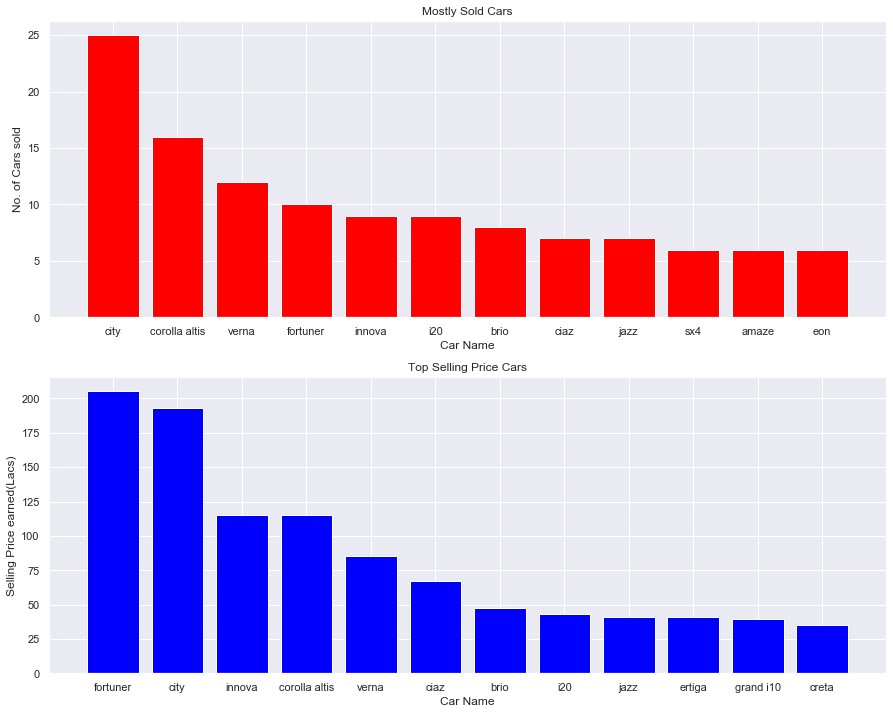

In [11]:
sns.set_style("darkgrid")
sns.set_context("notebook")
plt.figure(figsize=(15,12))

x=most_sell_cars.index
y=most_sell_cars.values

plt.subplot(2,1,1)
plt.bar(x,y,color='r')
plt.xlabel('Car Name')
plt.ylabel('No. of Cars sold')
plt.title('Mostly Sold Cars')

x1=top_sellprice_cars.index
y1=top_sellprice_cars.values

plt.subplot(2,1,2)
plt.bar(x1,y1,color='b')
plt.xlabel('Car Name')
plt.ylabel('Selling Price earned(Lacs)')
plt.title('Top Selling Price Cars')

Now let's find the correlation amongst all variables.

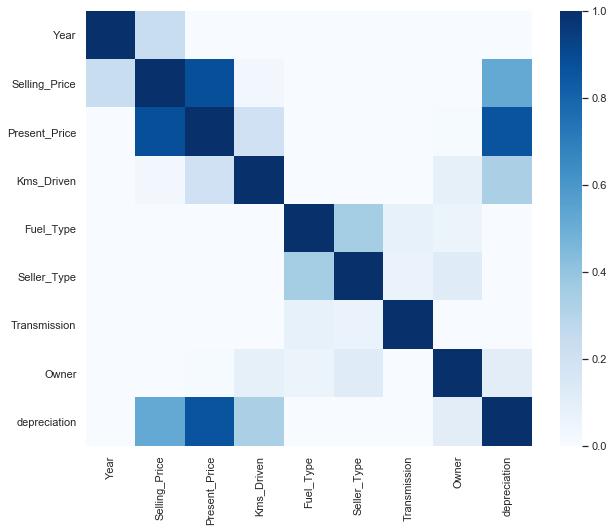

In [12]:
ax=cars.corr()
plt.figure(figsize=(10,8))
sns.heatmap(ax,cmap="Blues",vmin=0, vmax=1)

This means there is a strong corelation between Selling Price, Present price of cars and depreciation. Further, a less stronger relationship between Present Price- Kilometers driven, selling price-year of buying that car and so on. There is very less correlation of Selling price with Fuel_type,Seller_Type and Owner.

In addition, we can also see that depreciation has a stronger correlation with Present_Price followed by Selling_Price, Kms_Driver and Owner.

Since we know which variables have a higher correlation, let's dive in deep to compare individual variables.

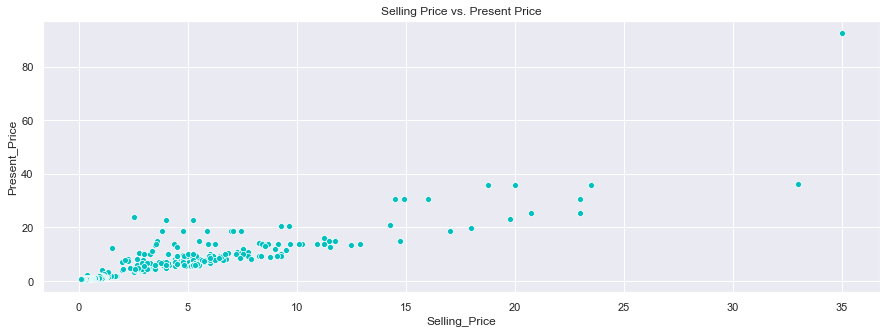

In [13]:
#Plotting relationship between Selling Price vs Present Price
plt.figure(figsize=(15,5))
x=cars['Selling_Price']
y=cars['Present_Price']

plt.title('Selling Price vs. Present Price')
sns.scatterplot(x,y,color='c')

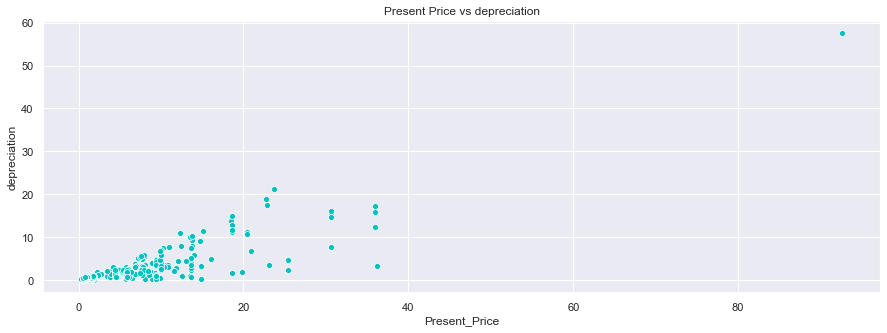

In [14]:
#Plotting relationship between Present Price vs depreciation.
plt.figure(figsize=(15,5))
x=cars['Present_Price']
y=cars['depreciation']

plt.title('Present Price vs depreciation')
sns.scatterplot(x,y,color='c')

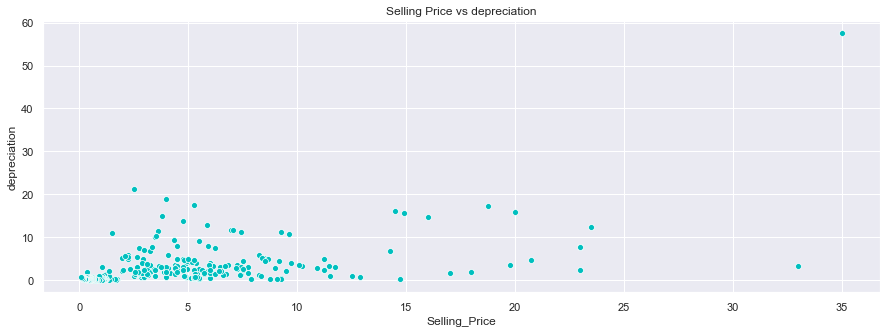

In [15]:
#Plotting relationship between Selling Price vs depreciation.
plt.figure(figsize=(15,5))
x=cars['Selling_Price']
y=cars['depreciation']

plt.title('Selling Price vs depreciation')
sns.scatterplot(x,y,color='c')

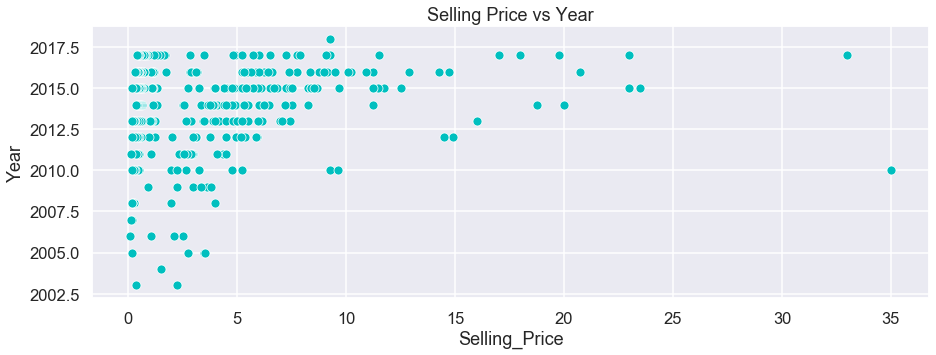

In [16]:
#Plotting relationship between Selling Price vs. Year
sns.set_context("talk")
plt.figure(figsize=(15,5))
x=cars['Selling_Price']
y=cars['Year']

plt.title('Selling Price vs Year')
sns.scatterplot(x,y,color='c')

The cars bought after year-2010 have higher selling prices than older models of cars.

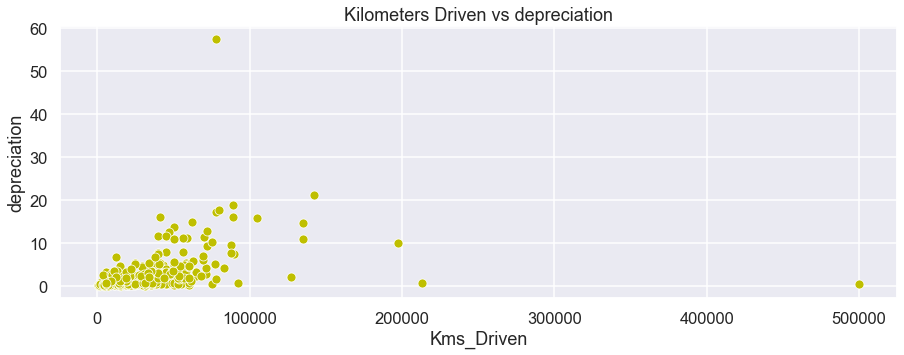

In [17]:
#Plotting relationship between  Kilometers Driven vs depreciation
sns.set_context("talk")
plt.figure(figsize=(15,5))
y=cars['depreciation']
x=cars['Kms_Driven']

plt.title('Kilometers Driven vs depreciation')
sns.scatterplot(x,y,color='y')

Additionally, let's find the relation of depreciation with the owner.

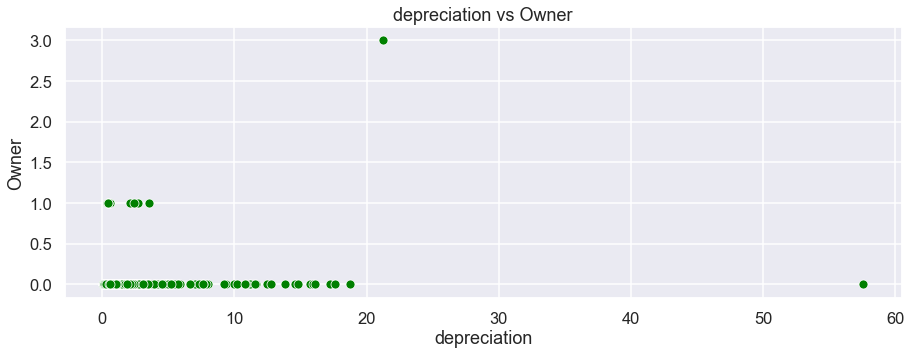

In [18]:
sns.set_context("talk")
plt.figure(figsize=(15,5))
x=cars['depreciation']
y=cars['Owner']

plt.title('depreciation vs Owner')
sns.scatterplot(x,y,color='g')

From this, we can say that having less number of owners gives a less depreciation of cars.

Let us see an overall behaviour of depreciation with other variables 

Text(0.5, 1.0, 'depreciation vs Transmission')

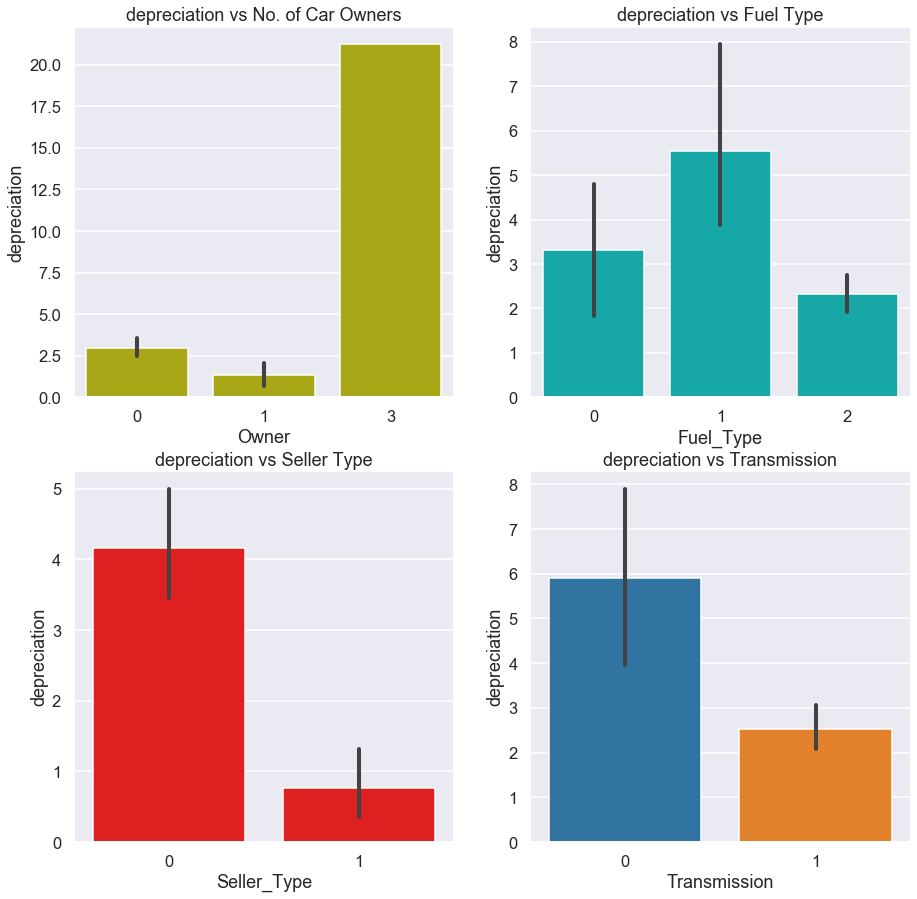

In [19]:
#sns.set_style("ticks")
#sns.set_context("talk")
plt.figure(figsize=(15,15))
y1=cars['depreciation']
x1=cars['Owner']
plt.subplot(221)
plt.title('depreciation vs No. of Car Owners')
sns.barplot(x1,y1,color='y')

y2=cars['depreciation']
x2=cars['Fuel_Type']
plt.subplot(222)
sns.barplot(x2,y2,color='c')
plt.title('depreciation vs Fuel Type')

y3=cars['depreciation']
x3=cars['Seller_Type']
plt.subplot(223)
plt.title('depreciation vs Seller Type')
sns.barplot(x3,y3,color='r')


y4=cars['depreciation']
x4=cars['Transmission']
plt.subplot(224)
sns.barplot(x4,y4)
plt.title('depreciation vs Transmission')

Here, we can find following obervations:

* The cars with more number of owners are having large reduction of Selling Price.
* Cars with Fule Type-1(i.e Diesel Cars) have higher depreciaiton in Selling Price.
* Seller Type-0(i.e. Cars sold from Dealers have higher depreciation in Selling Price.
* The cars with Manual transmission(i.e. value=0) have higher depreciation in Selling Price.

Moving ahead, Lets make a seprate dataset and include the variables we are going to use to visualise our data which would help us see which car has the best and worst re-sale values.

In [20]:
depr = cars[['Car_Name', 'depreciation']]
depr.head()

,Car_Name,depreciation
0,ritz,2.24
1,sx4,4.79
2,ciaz,2.60
3,wagon r,1.30
4,swift,2.27


Using group by and then sorting it in descending order gives us the car with the maximum depreciation

In [21]:
grouped = depr.groupby('Car_Name').mean()
grouped.sort_values('depreciation', ascending=False)

,depreciation
Car_Name,
land cruiser,57.600000
camry,21.230000
fortuner,12.047273
corolla,10.850000
corolla altis,10.399375
innova,5.068889
sx4,4.908333
city,4.372692
etios cross,3.333333


In [22]:
cars['Car_Name'].value_counts().head(10)

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
i20               9
innova            9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64

Lets analyse why other cars have such high depreciation and analyze some cars indvidually

Cars like Land Crusier, Camry,Corolla are havng only one record. So,let us analyse if there is any relationship between year and selling price of Fortuner and Corolla Altis.

In [23]:
fort=cars.query("Car_Name=='fortuner'")
fort.head(11)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
50,fortuner,2012,14.90,30.61,104707,1,0,0,0,15.71
51,fortuner,2015,23.00,30.61,40000,1,0,0,0,7.61
53,fortuner,2013,16.00,30.61,135000,1,1,0,0,14.61
59,fortuner,2014,19.99,35.96,41000,1,0,0,0,15.97
62,fortuner,2014,18.75,35.96,78000,1,0,0,0,17.21
63,fortuner,2015,23.50,35.96,47000,1,0,0,0,12.46
64,fortuner,2017,33.00,36.23,6000,1,0,0,0,3.23
67,fortuner,2010,9.25,20.45,59000,1,0,1,0,11.20
79,fortuner,2012,14.50,30.61,89000,1,0,0,0,16.11
93,fortuner,2015,23.00,30.61,40000,1,0,0,0,7.61


In [24]:
corolla_alt=cars.query("Car_Name == 'corolla altis'")
corolla_alt.head(11)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation
55,corolla altis,2009,3.60,15.04,70000,2,0,0,0,11.44
57,corolla altis,2010,4.75,18.54,50000,2,0,1,0,13.79
60,corolla altis,2013,6.95,18.61,40001,2,0,1,0,11.66
68,corolla altis,2011,4.35,13.74,88000,2,0,1,0,9.39
69,corolla altis,2016,14.25,20.91,12000,2,0,1,0,6.66
71,corolla altis,2011,4.50,12.48,45000,1,0,1,0,7.98
72,corolla altis,2013,7.45,18.61,56001,2,0,1,0,11.16
76,corolla altis,2013,5.50,14.68,72000,2,0,1,0,9.18
78,corolla altis,2010,5.25,22.83,80000,2,0,0,0,17.58
80,corolla altis,2016,14.73,14.89,23000,1,0,1,0,0.16


Text(0.5, 1.0, 'Depreciation of Corolla Altis over year')

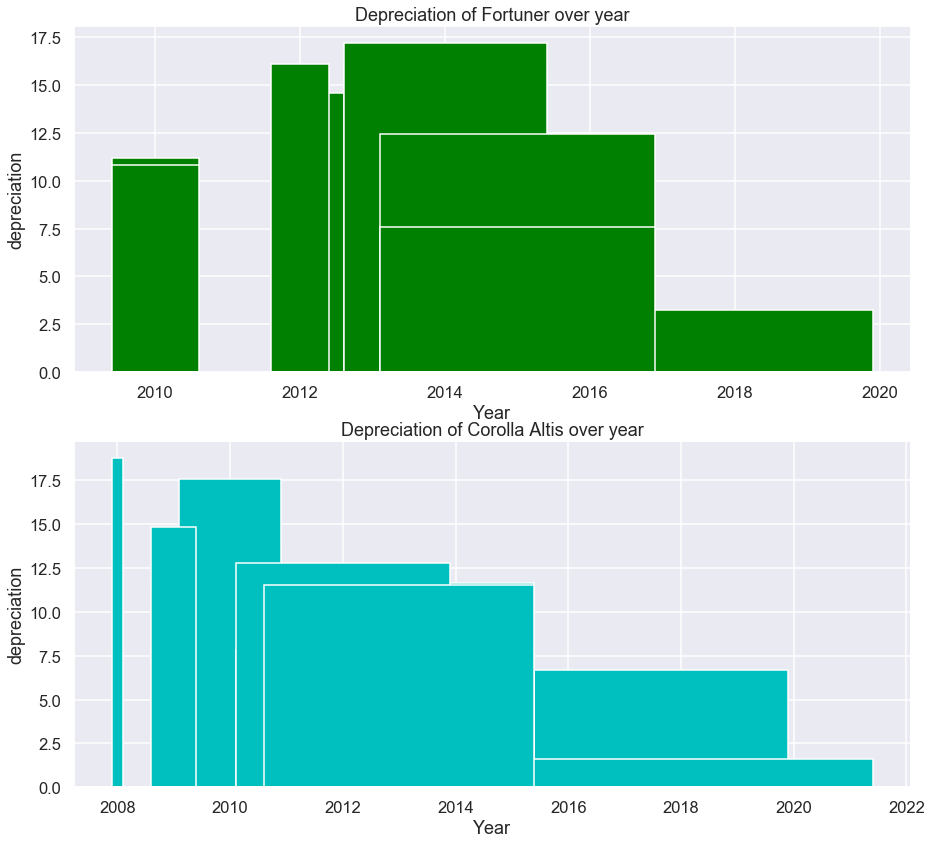

In [25]:
# Selling Price vs. Year

#sns.set_style("ticks")
#sns.set_context("notebook")
plt.figure(figsize=(15,14))

# For Fortuner
fort=cars.query("Car_Name=='fortuner'")
x= fort['Year']
y= fort['depreciation']
plt.subplot(2,1,1)
plt.bar(x,y,color='g')
plt.xlabel('Year')
plt.ylabel('depreciation')
plt.title('Depreciation of Fortuner over year')

# For Corolla Altis
corolla_alt=cars.query("Car_Name == 'corolla altis'")
corolla_alt
x1=corolla_alt['Year']
y1=corolla_alt['depreciation']
plt.subplot(2,1,2)
plt.bar(x1,y1,color='c')
plt.xlabel('Year')
plt.ylabel('depreciation')
plt.title('Depreciation of Corolla Altis over year')

The above graph shows that variables such as Transmission and Seller_Type do not have much impact on depreciation as compared to Kms_Driver and Year.
Hence, we can conclude that Kms_driven and year have a hige impact on depreciation than other factors.